#### Quando i nostri ristoranti vendono di più? In corrispondenza di che festività? 

In [1]:
import pandas as pd
import datetime 
import holidays
from collections import ChainMap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [2]:
data_cleaned=pd.read_csv("datapuliti.csv", index_col=0)

In [3]:
data_cleaned["Date"]=pd.to_datetime(data_cleaned["Date"])

In [4]:
# Select country
it_holidays_2017= holidays.Italy(years = 2017)
it_holidays_2018= holidays.Italy(years = 2018)
it_holidays_2019= holidays.Italy(years = 2019)
it_holidays_2020= holidays.Italy(years = 2020)
it_holidays_2021= holidays.Italy(years = 2021)

In [5]:
d4 = dict(it_holidays_2017)
d4.update(it_holidays_2018)
d4.update(it_holidays_2019)
d4.update(it_holidays_2020)
d4.update(it_holidays_2021)

In [6]:
def ciao(x):
    l=list(d4.keys())
    y=0
    for i in l: 
        if x ==i:
            y=d4.get(i)
    return y


data_cleaned['Holidays']=data_cleaned['Date'].apply(ciao)

        
    

C:\Users\Lilia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  """


In [7]:
data_cleaned[data_cleaned['Holidays'] == "Pasqua di Resurrezione"]


,Date,Vendite_1,Scontrini_1,Vendite_2,Scontrini_2,Vendite_3,Scontrini_3,Vendite_4,Scontrini_4,Vendite_5,Scontrini_5,Vendite_6,Scontrini_6,week_day,Holidays
106,2017-04-16,3270.03,395,5326.99,565,0.0,0,0.0,0,3003.85,345,0.00,0,Sunday,Pasqua di Resurrezione
456,2018-04-01,2361.32,295,5943.49,599,0.0,0,0.0,0,3504.49,415,2216.18,285,Sunday,Pasqua di Resurrezione
841,2019-04-21,2532.04,290,5900.83,564,0.0,0,0.0,0,4214.62,514,2478.29,337,Sunday,Pasqua di Resurrezione
1198,2020-04-12,0.00,0,0.00,0,0.0,0,0.0,0,0.00,0,0.00,0,Sunday,Pasqua di Resurrezione
1555,2021-04-04,0.00,0,0.00,0,0.0,0,0.0,0,0.00,0,0.00,0,Sunday,Pasqua di Resurrezione


In [8]:
data_cleaned.to_csv("dati_con_fest.csv")


In [9]:
data_cleaned.columns

Index(['Date', 'Vendite_1', 'Scontrini_1', 'Vendite_2', 'Scontrini_2',
       'Vendite_3', 'Scontrini_3', 'Vendite_4', 'Scontrini_4', 'Vendite_5',
       'Scontrini_5', 'Vendite_6', 'Scontrini_6', 'week_day', 'Holidays'],
      dtype='object')

In [10]:
dati_senza_data=data_cleaned

In [11]:
data_1=data_cleaned.groupby("Holidays",as_index=False)["Vendite_1"].sum()
data_1= data_1.drop(labels=0,axis=0)

In [12]:
data_2=data_cleaned.groupby("Holidays",as_index=False)["Vendite_2"].sum()
data_2= data_2.drop(labels=0,axis=0)

In [13]:
data_3=data_cleaned.groupby("Holidays",as_index=False)["Vendite_3"].sum()
data_3= data_3.drop(labels=0,axis=0)

In [14]:
data_4=data_cleaned.groupby("Holidays",as_index=False)["Vendite_4"].sum()
data_4= data_4.drop(labels=0,axis=0)

In [15]:
data_5=data_cleaned.groupby("Holidays",as_index=False)["Vendite_5"].sum()
data_5= data_5.drop(labels=0,axis=0)

In [16]:
data_6=data_cleaned.groupby("Holidays",as_index=False)["Vendite_6"].sum()
data_6= data_6.drop(labels=0,axis=0)

#### 1. Analisi descrittiva - correlazioni, pie chart, bar chart, scatter plot, box plot


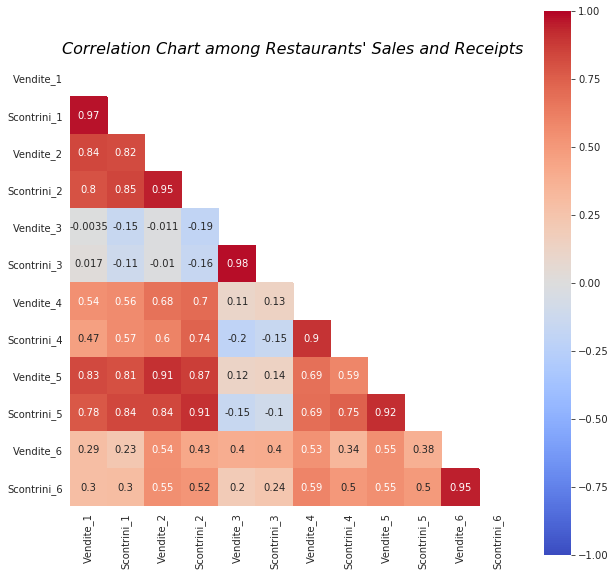

In [17]:
corrMatrix=data_cleaned.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    plt.title("Correlation Chart among Restaurants' Sales and Receipts", fontsize = 16, color='Black', fontstyle='italic')
    ax = sns.heatmap(corrMatrix, mask=mask, cmap='coolwarm', vmin=-1,vmax=1, annot=True, square=True, annot_kws={'size':10})
    #plt.ylabel(rotation='vertical')
    plt.savefig('corr.jpg', bbox_inches='tight')

In [18]:
media_vendite1=data_cleaned.groupby("Holidays",as_index=False)["Vendite_1"].mean()
media_vendite2=data_cleaned.groupby("Holidays",as_index=False)["Vendite_2"].mean()
media_vendite3=data_cleaned.groupby("Holidays",as_index=False)["Vendite_3"].mean()
media_vendite4=data_cleaned.groupby("Holidays",as_index=False)["Vendite_4"].mean()
media_vendite5=data_cleaned.groupby("Holidays",as_index=False)["Vendite_5"].mean()
media_vendite6=data_cleaned.groupby("Holidays",as_index=False)["Vendite_6"].mean()


In [19]:
err1=list(data_cleaned.groupby("Holidays")["Vendite_1"].std())
err2=list(data_cleaned.groupby("Holidays")["Vendite_2"].std())
err3=list(data_cleaned.groupby("Holidays")["Vendite_3"].std())
err4=list(data_cleaned.groupby("Holidays")["Vendite_4"].std())
err5=list(data_cleaned.groupby("Holidays")["Vendite_5"].std())
err6=list(data_cleaned.groupby("Holidays")["Vendite_6"].std())


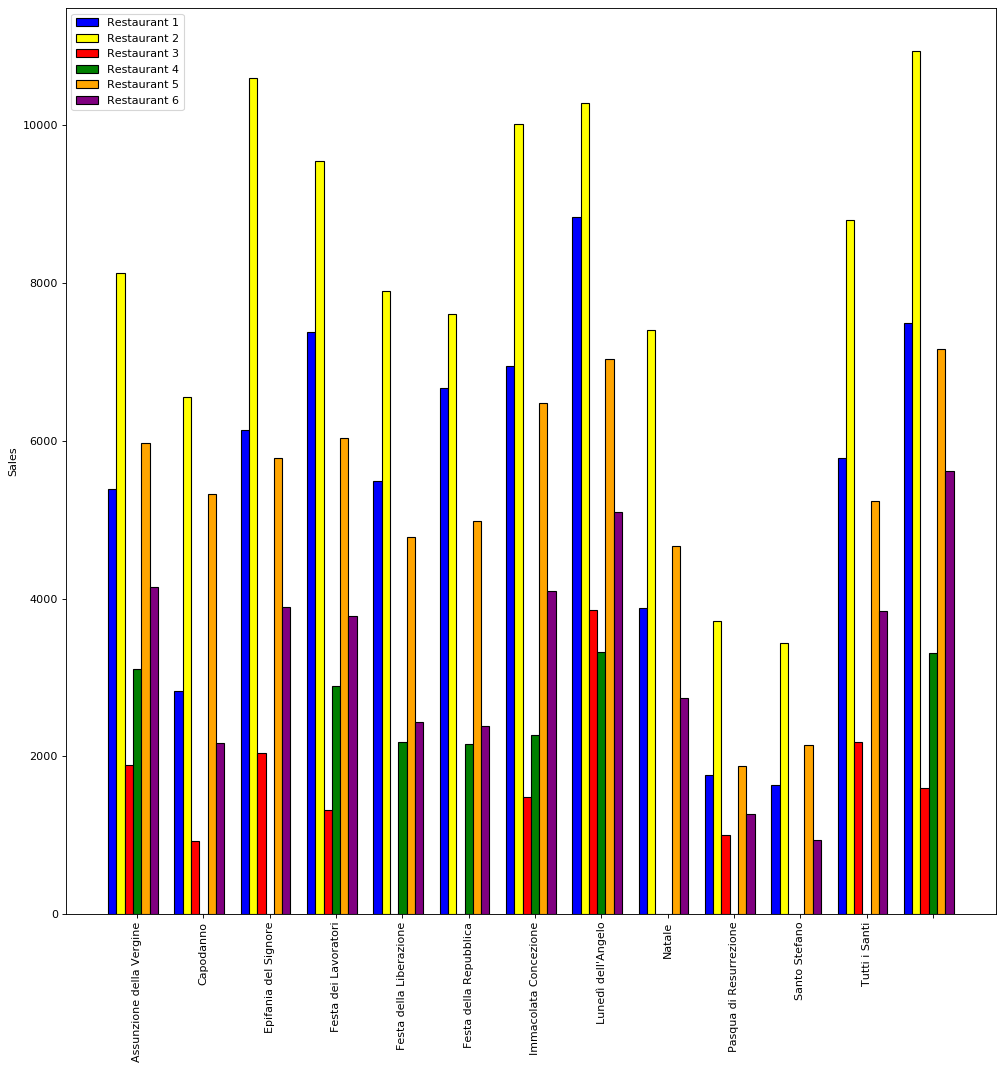

In [20]:
plt.figure(figsize=(15,15), dpi=80)
# width of the bars
barWidth = 1
 
# Choose the height of the blue bars
bars1 = media_vendite1["Vendite_1"]
bars2 = media_vendite2["Vendite_2"]
bars3 = media_vendite3["Vendite_3"]
bars4 = media_vendite4["Vendite_4"]
bars5 = media_vendite5["Vendite_5"]
bars6 = media_vendite6["Vendite_6"]

# The x position of bars
r1 = [0,   8,   16,   24,    32,   40,    48,    56,   64,   72,   80,  88, 96]
r2 = [r+barWidth for r in r1]
     #[0.5, 4.5, 8.5, 12.5,  16.5, 20.5,  24.5, 28.5, 32.5, 36.5, 40.5, 44.5]
r3 = [r+barWidth for r in r2] 
#[1,   5,   9,   13,  17, 21,  25, 29, 33, 37, 41, 45]
r4 = [r+barWidth for r in r3]
#[1.5, 5.5, 9.5, 13.5,  17.5, 21.5,  25.5, 29.5, 33.5, 37.5, 41.5, 45.5]
r5 = [r+barWidth for r in r4]
#[2,   6,   10,  14,  18, 22,  26, 30, 34, 38, 42, 46]
r6 = [r+barWidth for r in r5]
#[2.5, 6.5, 10.5, 14.5,  18.5, 22.5,  26.5, 30.5, 34.5, 38.5, 42.5, 46.5]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Restaurant 1')
plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', capsize=7, label='Restaurant 2')
plt.bar(r3, bars3, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='Restaurant 3')
plt.bar(r4, bars4, width = barWidth, color = 'green',edgecolor = 'black', capsize=7, label='Restaurant 4')
plt.bar(r5, bars5, width = barWidth, color = 'orange',edgecolor = 'black', capsize=7, label='Restaurant 5')
plt.bar(r6, bars6, width = barWidth, color = 'purple', edgecolor = 'black', capsize=7, label='Restaurant 6')

# general layout
plt.xticks(r4, data_1["Holidays"], rotation="vertical")
plt.ylabel('Sales')
plt.legend()
 
# Show graphic
plt.show()

In [21]:
np.mean(data_cleaned["Vendite_1"])

5387.1375239923145

Scegliamo di indagare i ristoranti 1 e 2 nel tempo per ogni festività

Ristorante 1,2,5 con overall sales >20000
Ristorante 3,4,6 con overall sales<20000



In [18]:
series1=data_cleaned[["week_day","Vendite_1","Date"]]
series1=series1.set_index("Date")

In [36]:
series1

,week_day,Vendite_1
Date,,
2017-01-01,Sunday,7627.12
2017-01-02,Monday,6987.16
2017-01-03,Tuesday,6480.88
2017-01-04,Wednesday,6601.46
2017-01-05,Thursday,8447.41
...,...,...
2021-04-08,Thursday,3779.84
2021-04-09,Friday,4368.67
2021-04-10,Saturday,4772.16


In [37]:
series1.columns=["week_day","Sales_1"]

C:\Users\Lilia\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


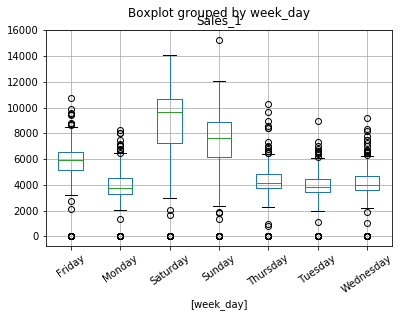

In [41]:
series1.boxplot(by="week_day", rot=35)
#plt.title("Sales per week day of Restaurant 1")
plt.savefig('Restaurant 1/box_week.png')

TypeError: boxplot() got an unexpected keyword argument 'rot'

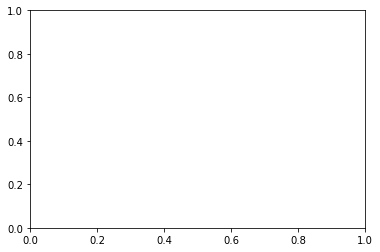

In [33]:
sns.boxplot(x=data_cleaned["week_day"], y=data_cleaned["Vendite_2"])

In [24]:
index_names = data_cleaned[ data_cleaned["Vendite_3"]==0 ].index
copia=data_cleaned.copy()
vendite_3_aperto=copia.drop(index_names)


Text(0.0, 1.0, 'Sales per week day of Restaurant 1')

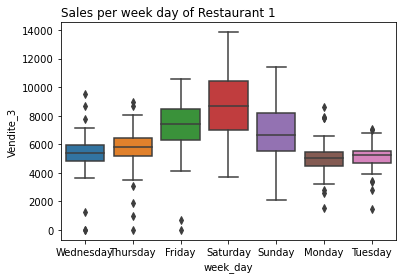

In [25]:
sns.boxplot(x=vendite_3_aperto["week_day"], y=vendite_3_aperto["Vendite_3"])

# add title
plt.title("Sales per week day of Restaurant 1", loc="left")


Text(0.0, 1.0, 'Sales per week day of Restaurant 4')

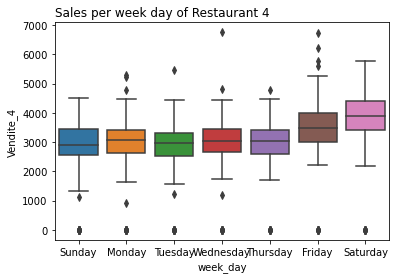

In [26]:
sns.boxplot(x=data_cleaned["week_day"], y=data_cleaned["Vendite_4"])
# add title
plt.title("Sales per week day of Restaurant 4", loc="left")

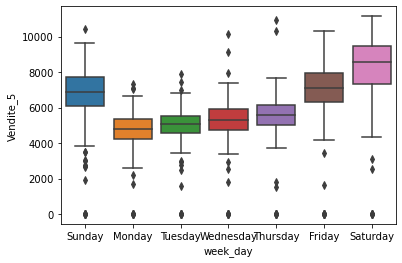

In [27]:
sns.boxplot(x=data_cleaned["week_day"], y=data_cleaned["Vendite_5"])

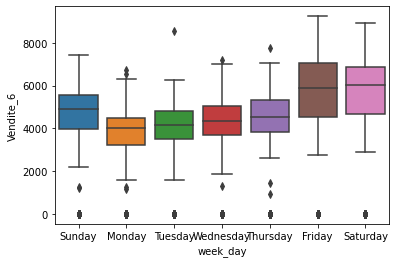

In [28]:
sns.boxplot(x=data_cleaned["week_day"], y=data_cleaned["Vendite_6"])

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

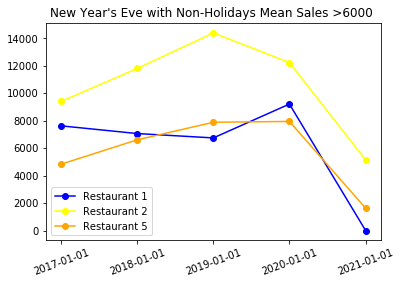

In [42]:
#Capodanno
capodanno=data_cleaned[data_cleaned["Holidays"]=="Capodanno"]
capodanno_1=capodanno[["Date","Vendite_1"]]
capodanno_2=capodanno[["Date","Vendite_2"]]
capodanno_3=capodanno[["Date","Vendite_3"]]
capodanno_5=capodanno[["Date","Vendite_5"]]
capodanno_6=capodanno[["Date","Vendite_6"]] #il 4 è chiuso


#plottiamo in due grafici separati i ristoranti con guadagno non festivo medio <6000 e i un altro quelli >6000
#sales non festive>6000
#plt.figure(figsize=(8,9), dpi=80)
plt.plot( 'Date', 'Vendite_1', data=capodanno_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_2', data=capodanno_2, marker='o', color='yellow',label="Restaurant 2")
plt.plot( 'Date', 'Vendite_5', data=capodanno_5, marker='o', color='orange',label="Restaurant 5")

plt.title("New Year's Eve with Non-Holidays Mean Sales >6000 ")
plt.xticks(capodanno_1["Date"], rotation=20)
plt.legend()
plt.savefig("Restaurant 1/sales_during_holidays.jpg")

C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lilia\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is 

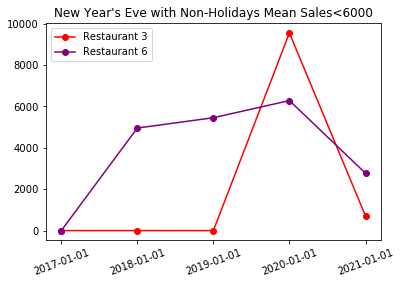

In [43]:
plt.plot( 'Date', 'Vendite_3', data=capodanno_3, marker='o', color='red',label="Restaurant 3")
plt.plot( 'Date', 'Vendite_6', data=capodanno_6, marker='o', color='purple',label="Restaurant 6")
plt.title("New Year's Eve with Non-Holidays Mean Sales<6000")
plt.xticks(capodanno_1["Date"], rotation=20)
plt.legend()
plt.savefig("Restaurant 1/sales_during_holidays1.jpg")

### Autocorrelation Plot

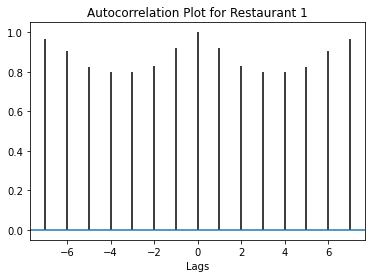

In [31]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 1") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_1"], maxlags = 7) 
  
plt.show() 


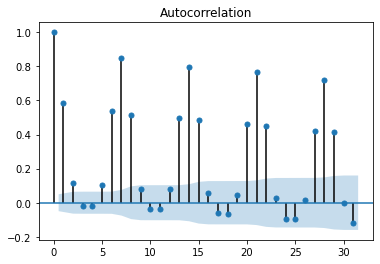

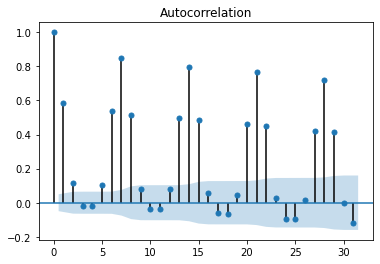

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_cleaned["Vendite_1"], lags=31)

This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

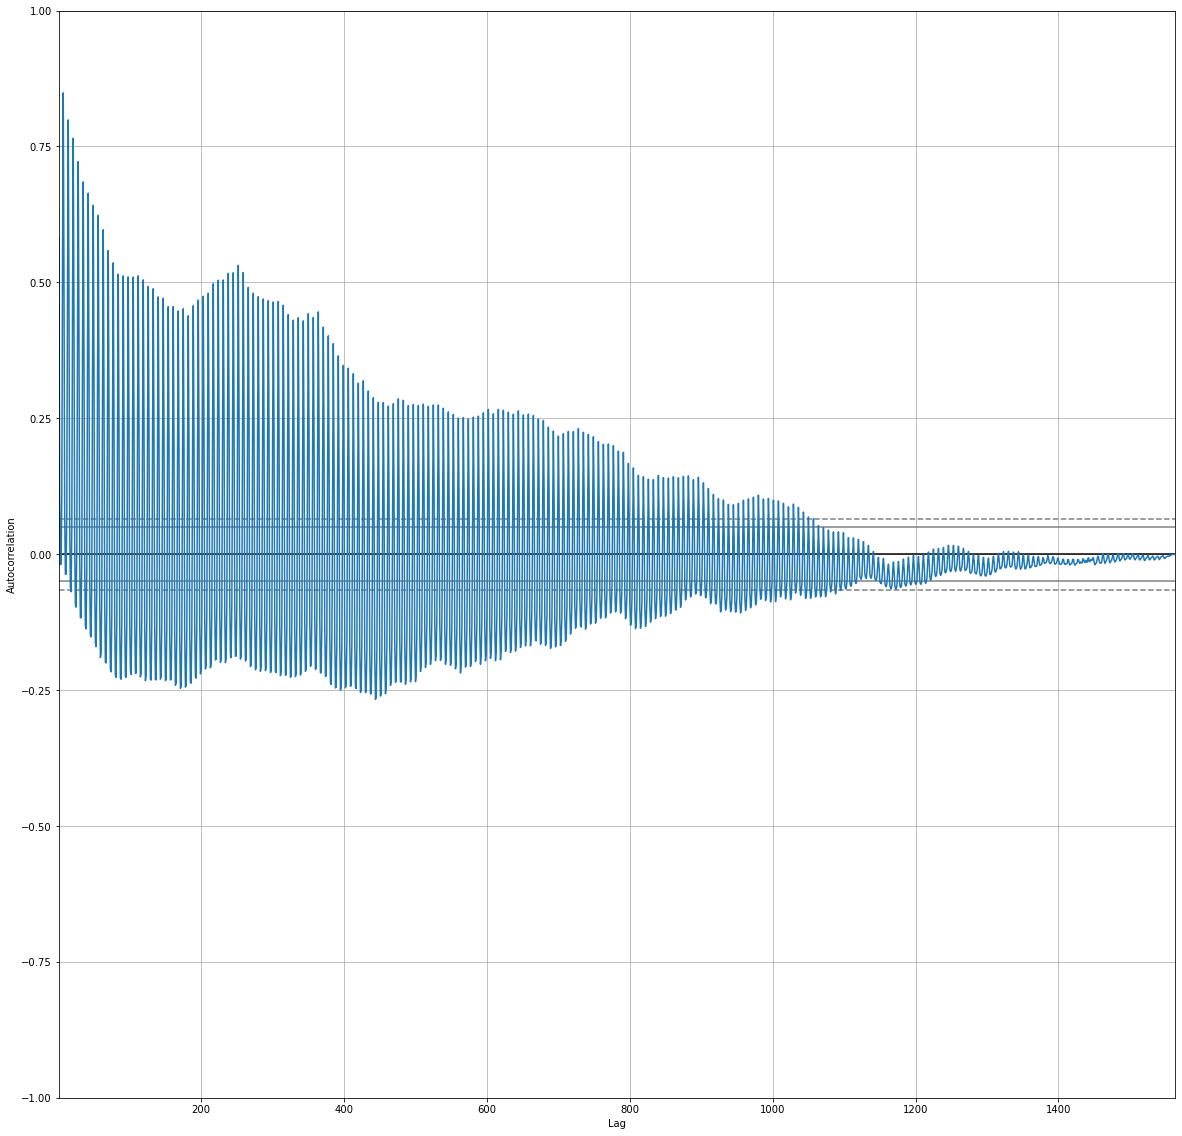

In [33]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_1"])
plt.show()

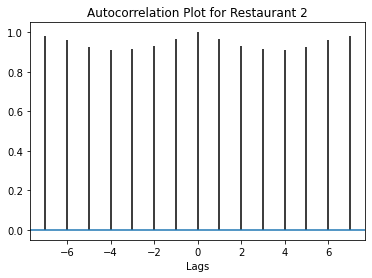

In [34]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 2") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_2"], maxlags = 7) 
  
plt.show() 

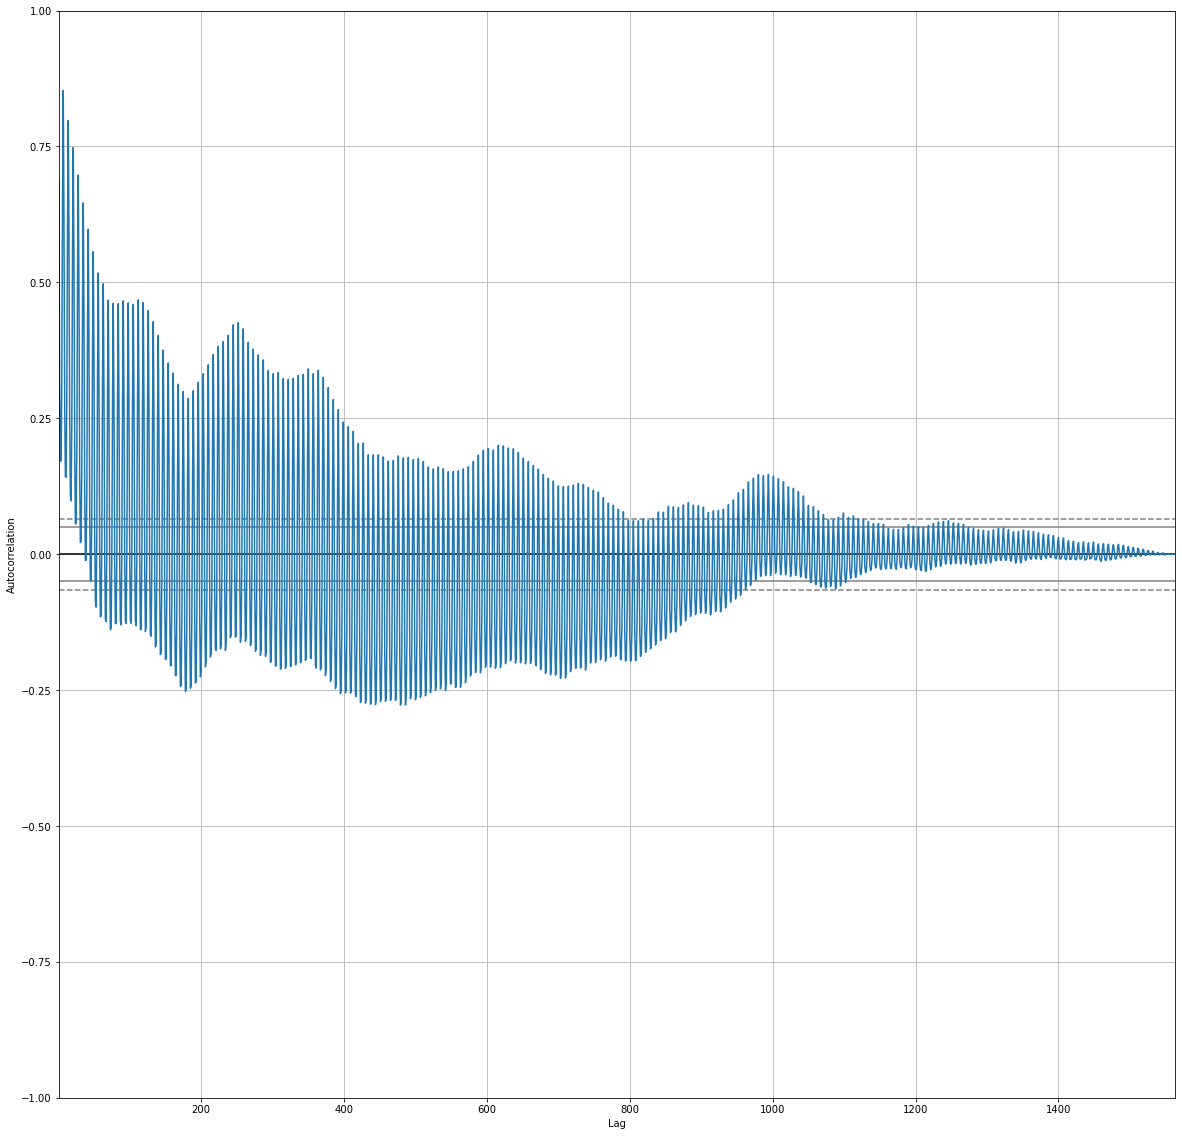

In [35]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_2"])
plt.show()

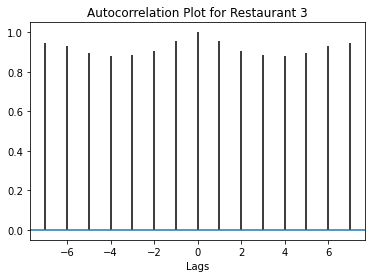

In [36]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 3") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_3"], maxlags = 7) 
  
plt.show() 

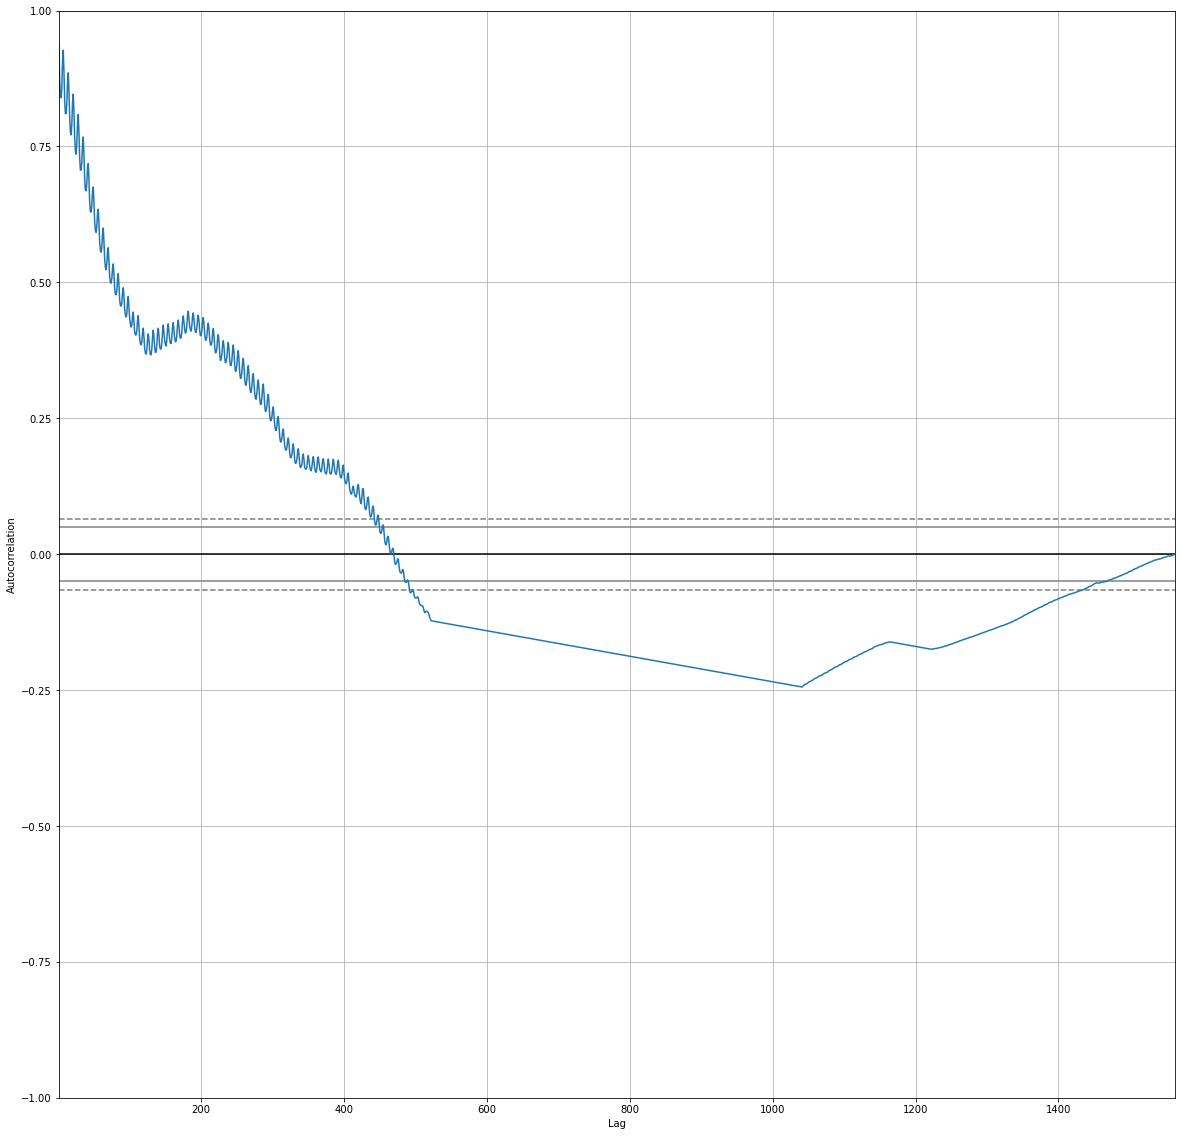

In [37]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_3"])
plt.show()

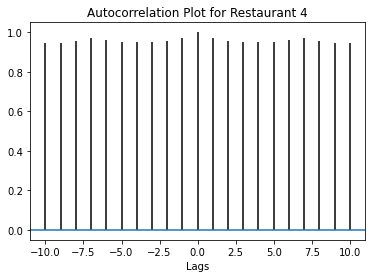

In [38]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 4") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_4"], maxlags = 10) 
  
plt.show() 

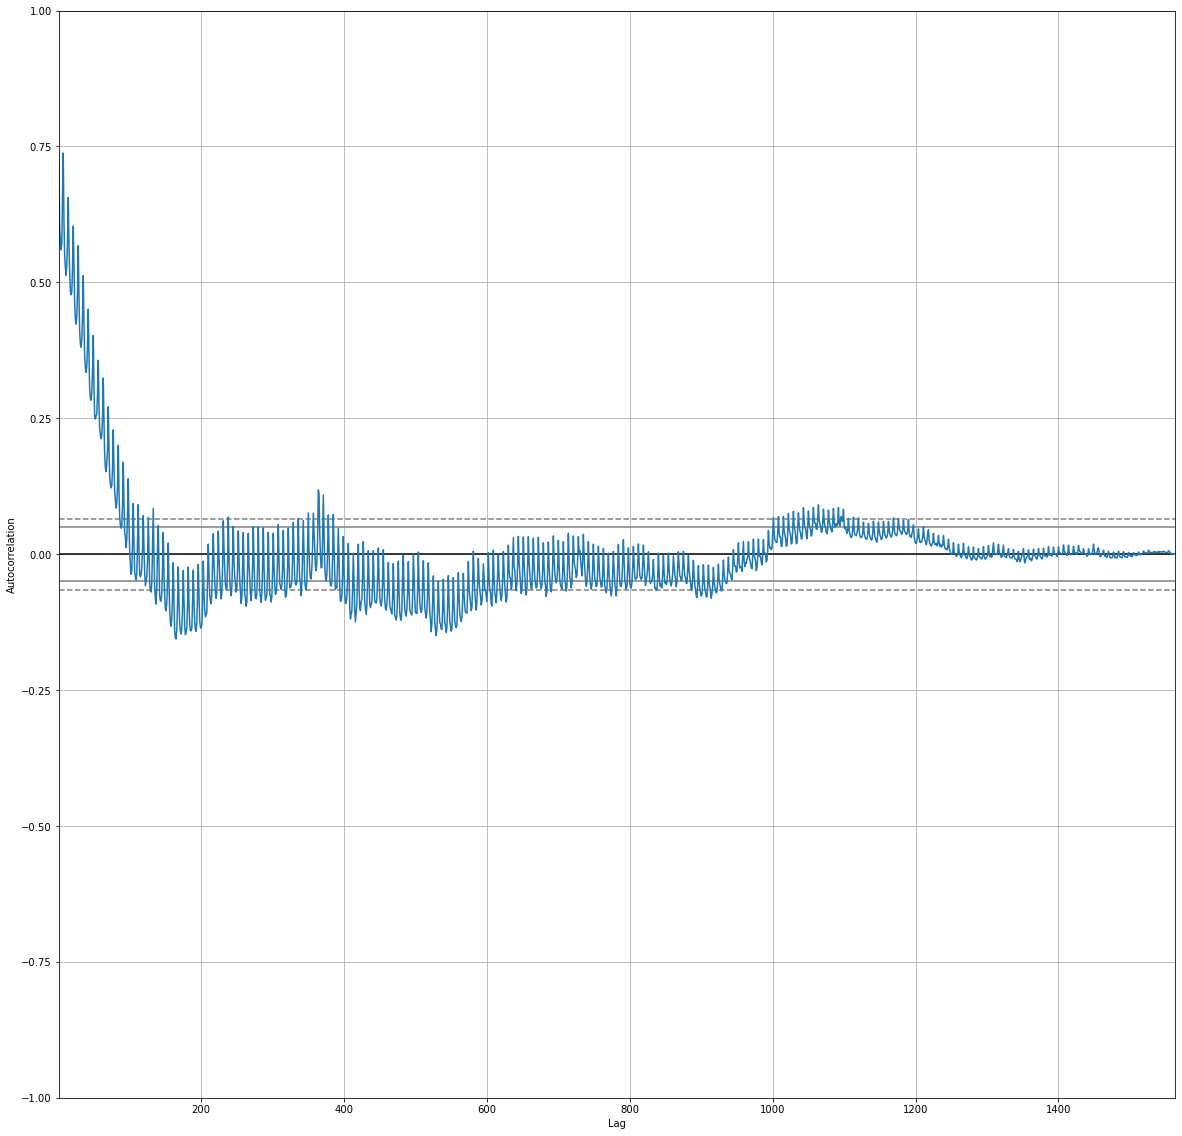

In [39]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_4"])
plt.show()

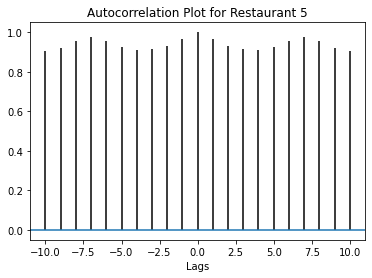

In [40]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 5") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_5"], maxlags = 10) 
  
plt.show() 

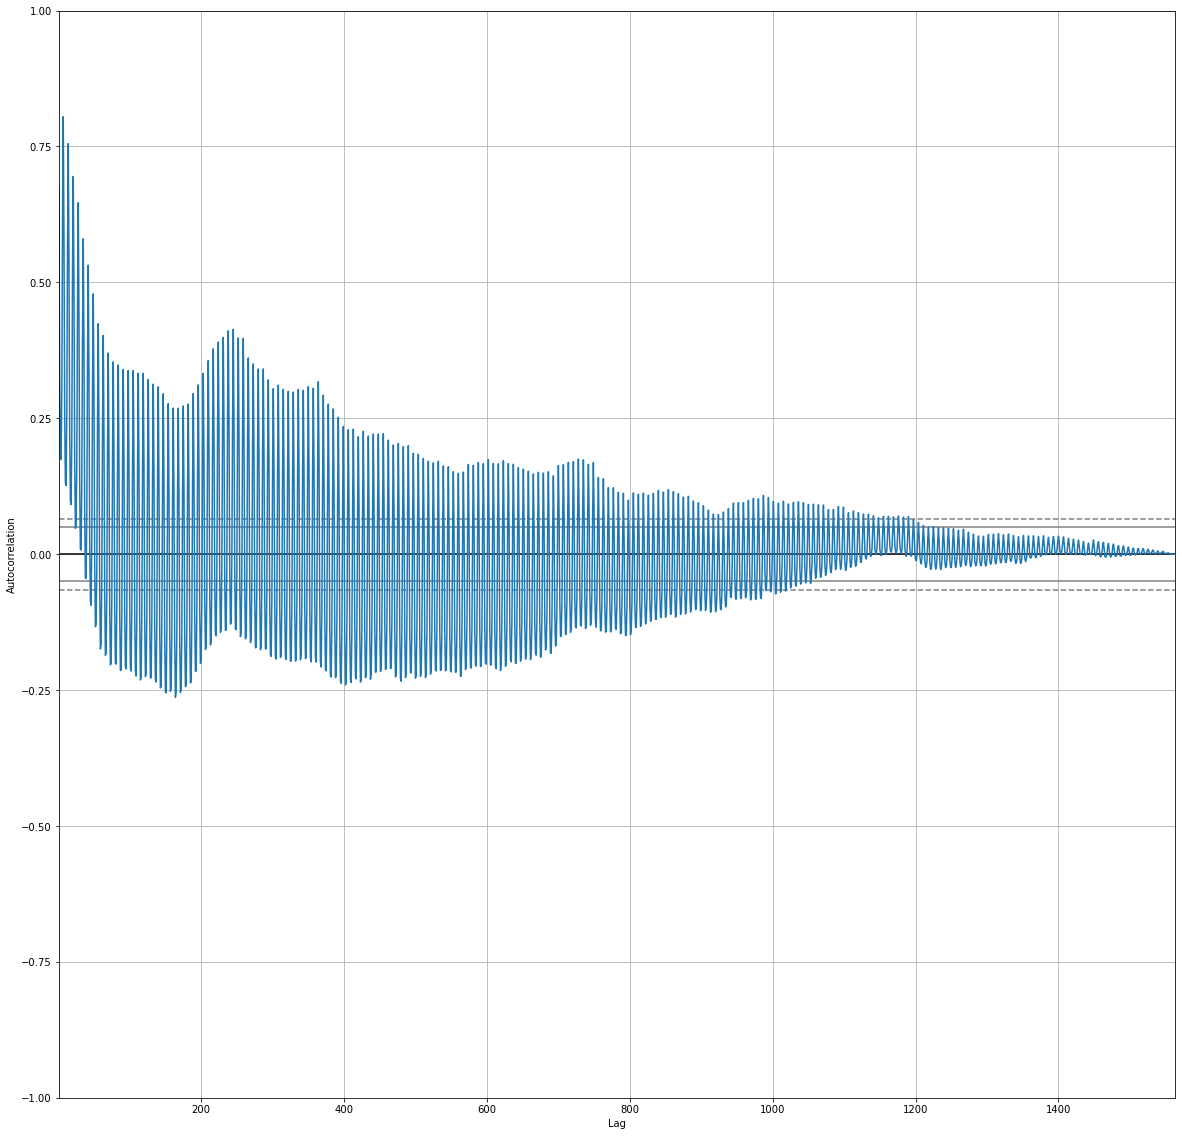

In [41]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_5"])
plt.show()

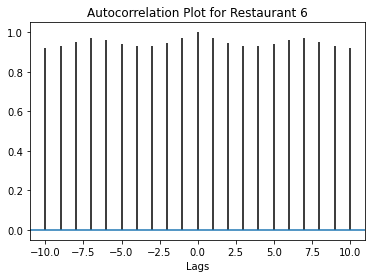

In [42]:
# Adding plot title.
plt.title("Autocorrelation Plot for Restaurant 6") 
  
# Providing x-axis name.
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot.
plt.acorr(data_cleaned["Vendite_6"], maxlags = 10) 
  
plt.show() 

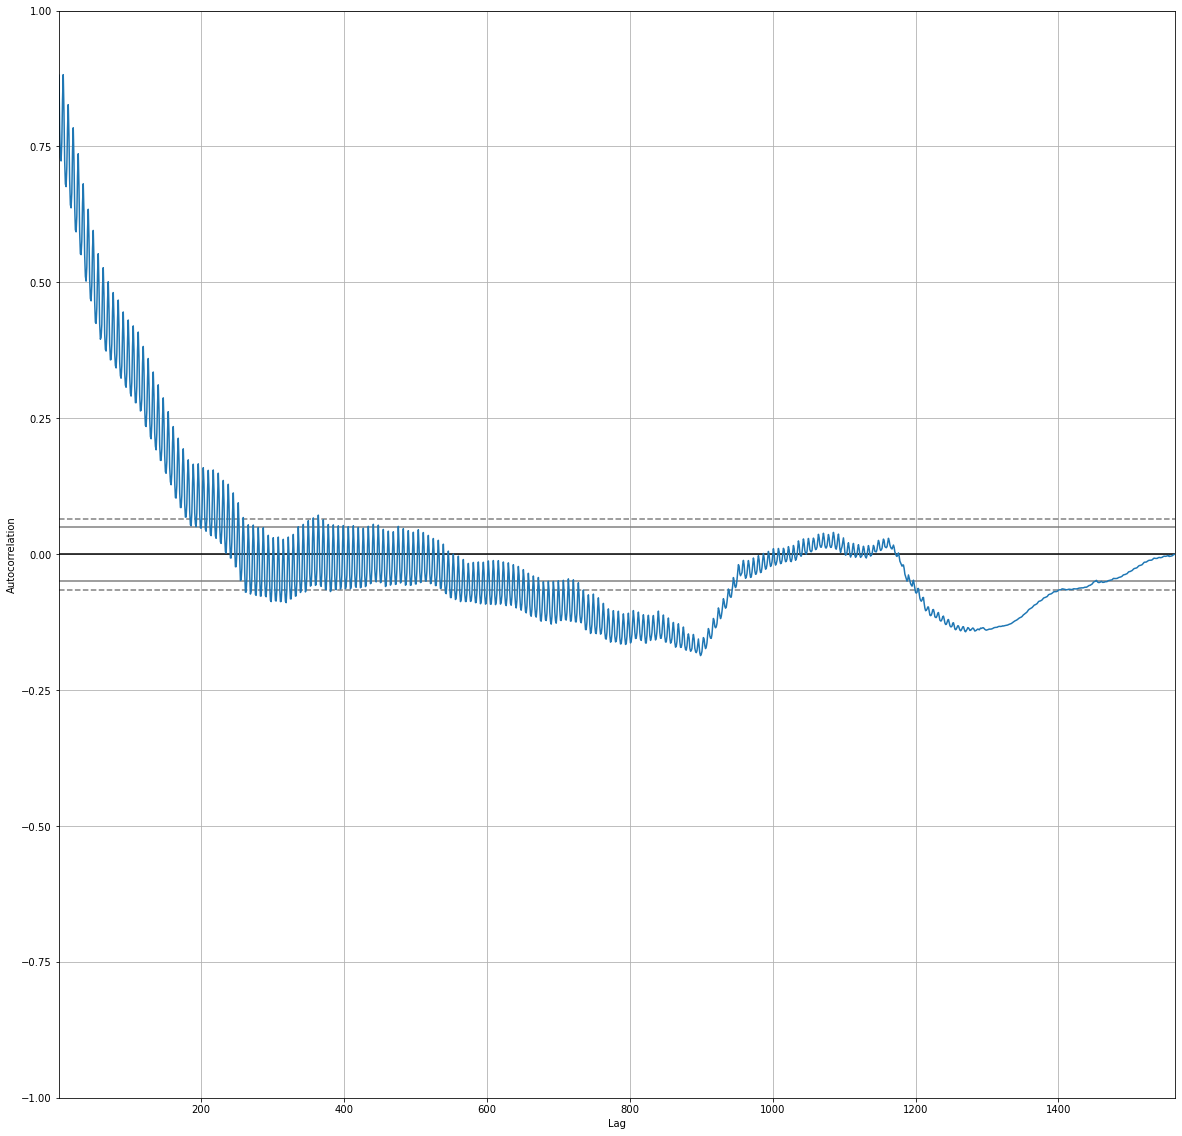

In [43]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,20))

autocorrelation_plot(data_cleaned["Vendite_6"])
plt.show()

### Lag Plot

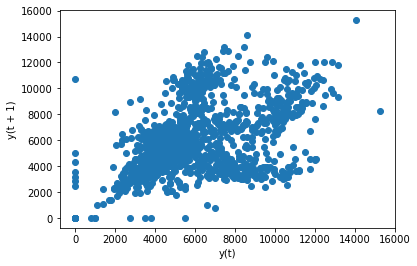

In [44]:
from pandas.plotting import lag_plot
lag_plot(data_cleaned["Vendite_1"])

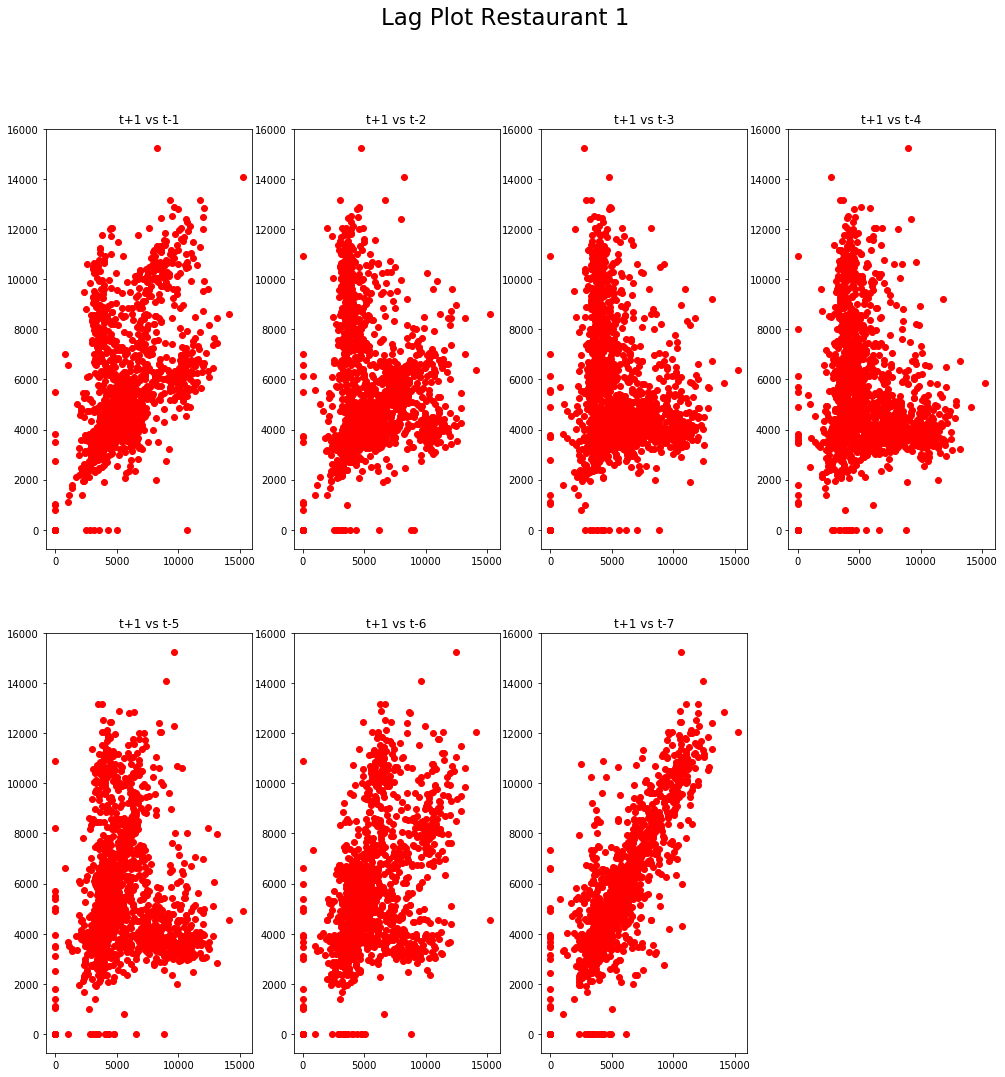

In [26]:
from pandas.plotting import scatter_matrix


values = pd.DataFrame(data_cleaned.Vendite_1)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values, color="red")
plt.suptitle("Lag Plot Restaurant 1", size=23)
plt.savefig("Restaurant 1/laplot1.jpg")

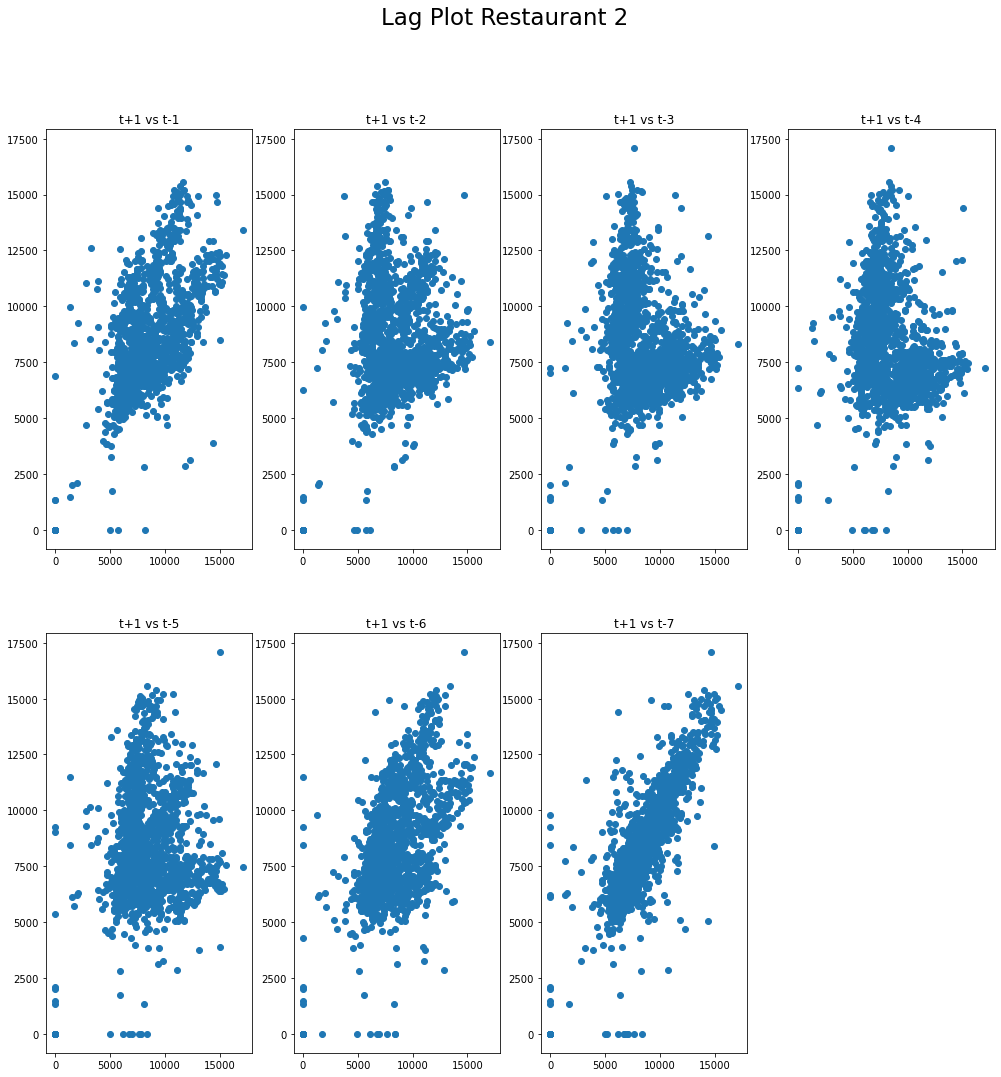

In [46]:
values = pd.DataFrame(data_cleaned.Vendite_2)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.suptitle("Lag Plot Restaurant 2", size=23)
plt.show()

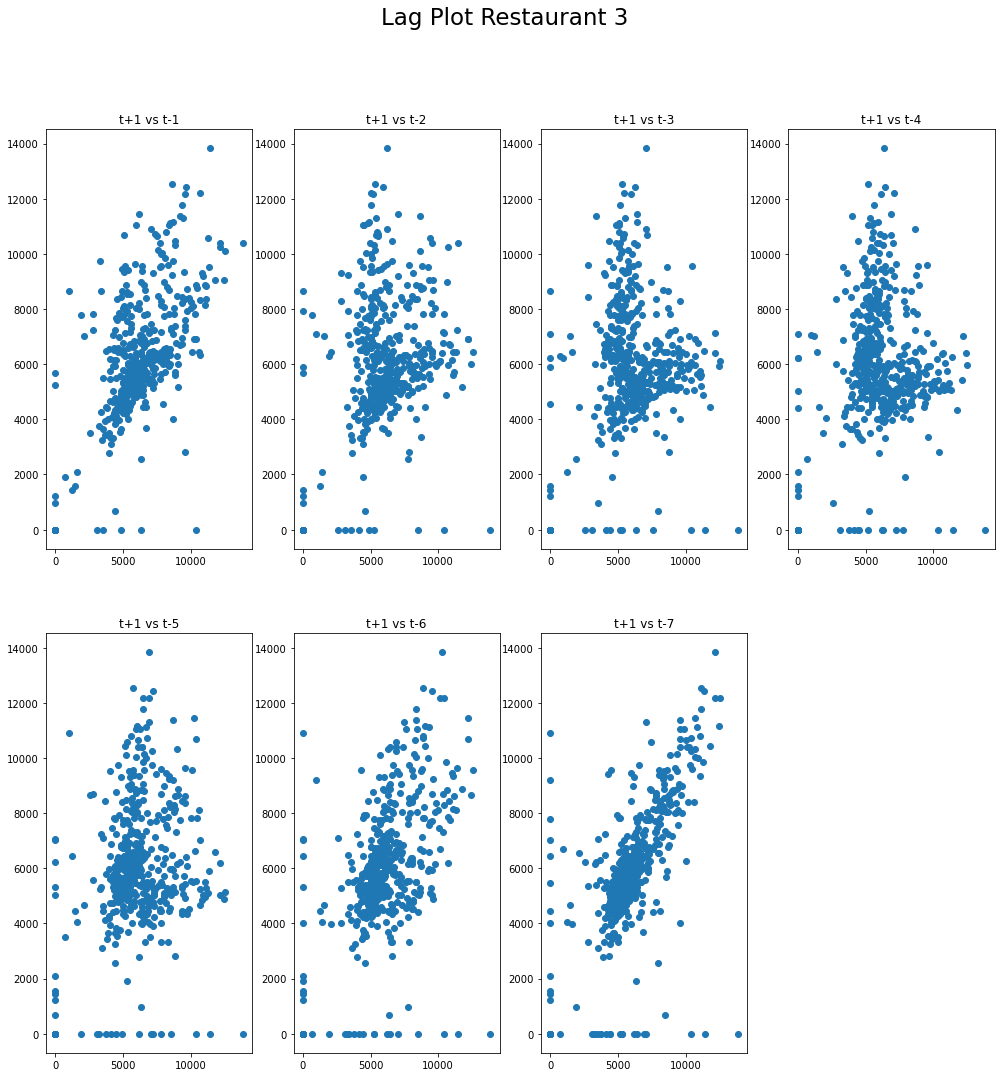

In [47]:
values = pd.DataFrame(data_cleaned.Vendite_3)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.suptitle("Lag Plot Restaurant 3", size=23)
plt.show()

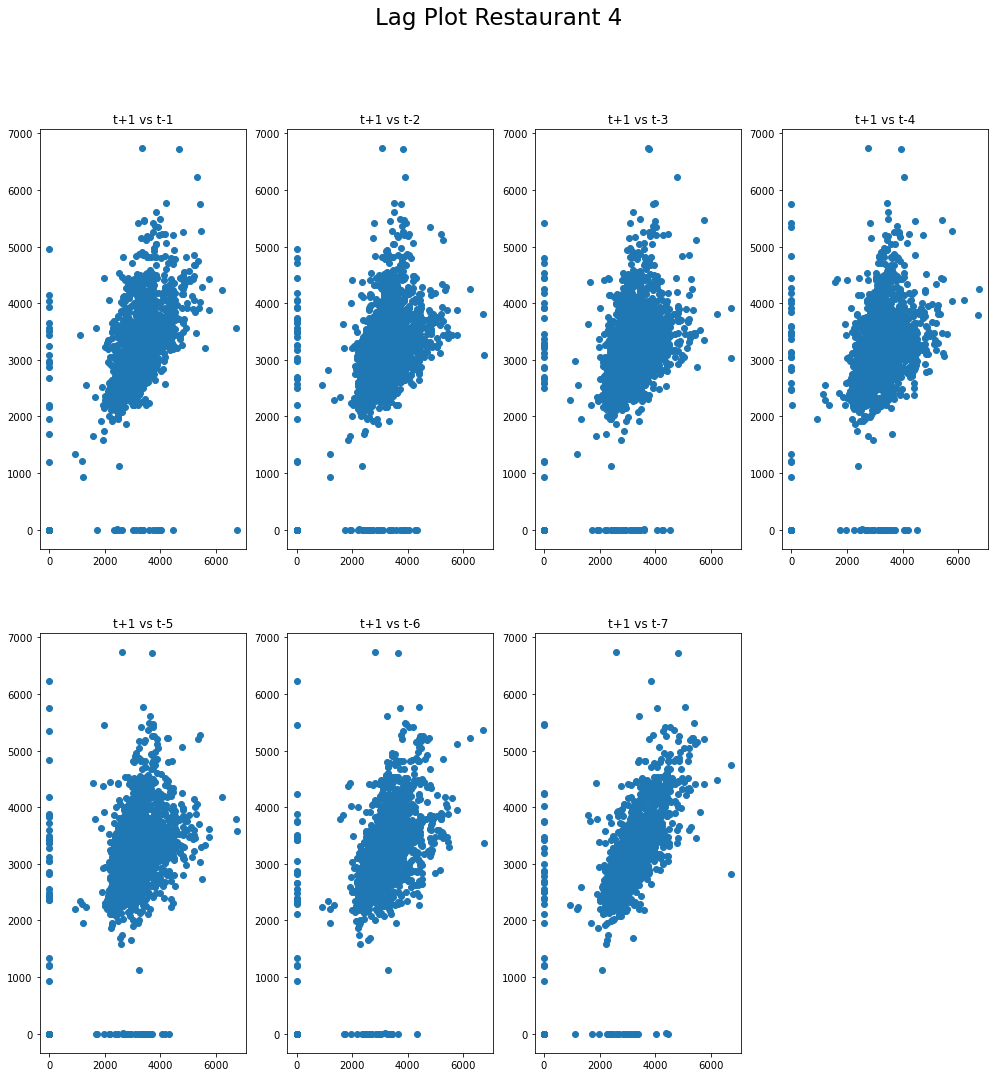

In [48]:
values = pd.DataFrame(data_cleaned.Vendite_4)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.suptitle("Lag Plot Restaurant 4", size=23)
plt.show()

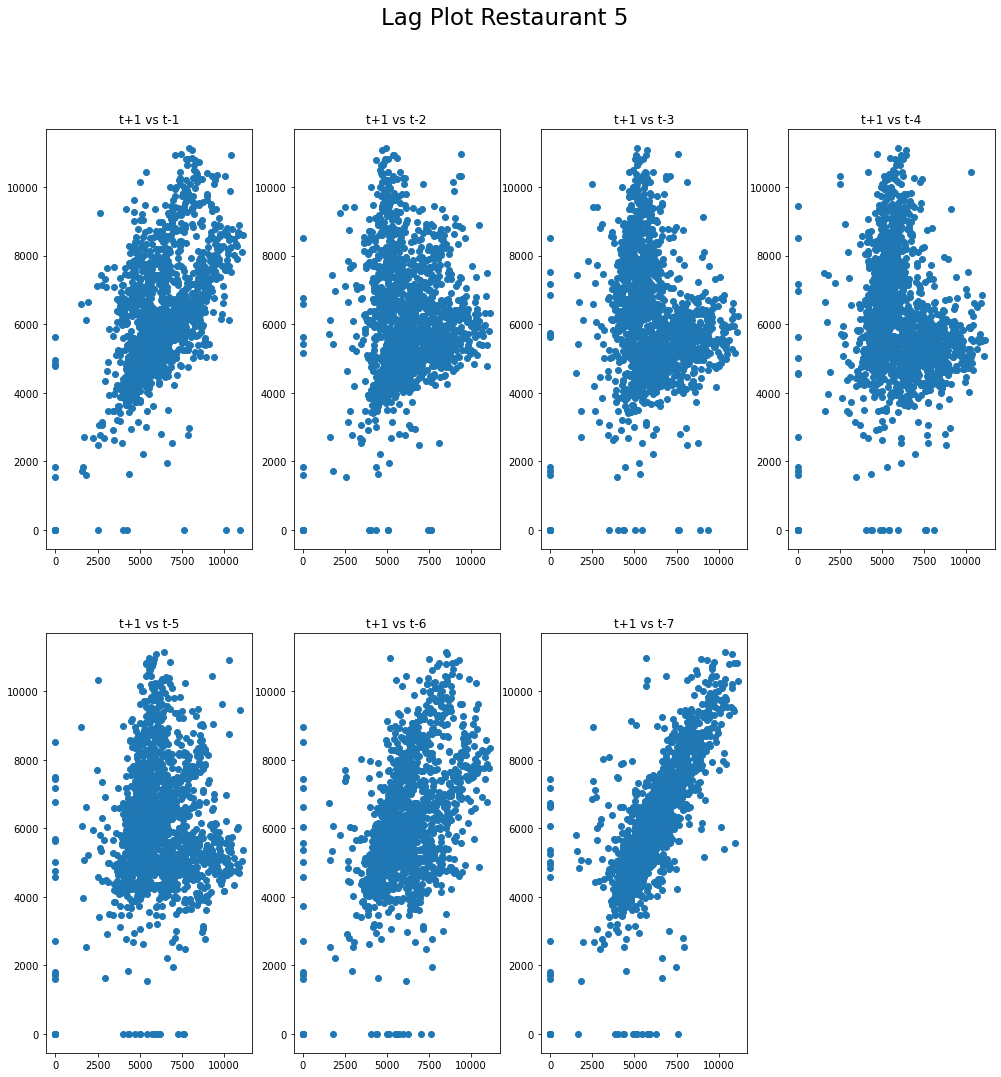

In [49]:
values = pd.DataFrame(data_cleaned.Vendite_5)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.suptitle("Lag Plot Restaurant 5", size=23)
plt.show()

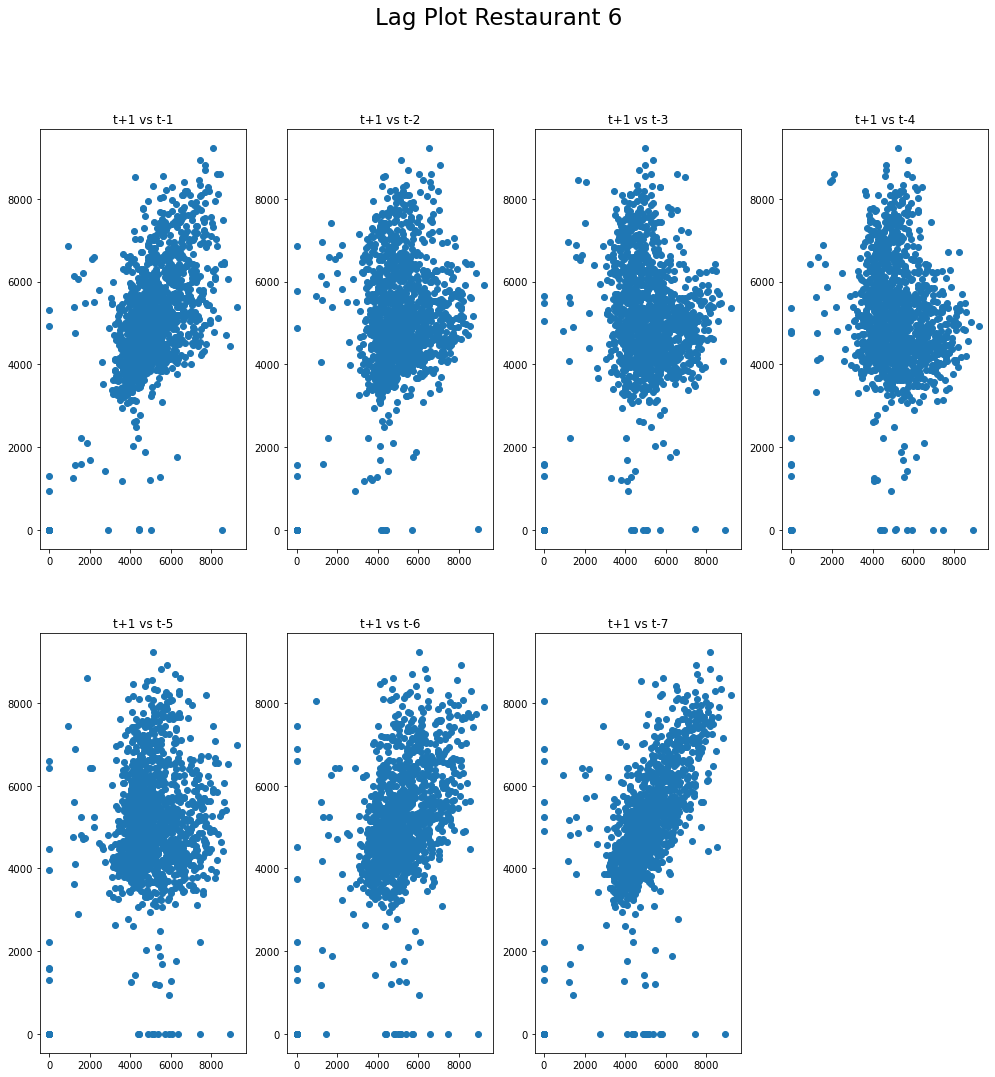

In [50]:
values = pd.DataFrame(data_cleaned.Vendite_6)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1,figsize=(17,17))
for i in range(1,(lags + 1)):
    ax = plt.subplot(240+i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.suptitle("Lag Plot Restaurant 6", size=23)
plt.show()

#### 2. A seguito dell'analisi descrittiva quali bar teniamo? Quali sono statisticamente significativi? Su quali andiamo a fare forecasting?
#### 3. Ricerca modello SERIE (mixed models, sarima, exponantional smoothing) - correlazioni, stagionalità, forecasting(quanto venderanno nel Natale 2021? E a Pasqua 2022?) 

In [51]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [52]:
series1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
series1=series1.set_index("x_values")

In [53]:
series1.to_csv("series1.csv")

In [51]:
print(series1.describe())

           y_values
count   1563.000000
mean    5387.137524
std     2644.549809
min        0.000000
25%     3713.455000
50%     4690.550000
75%     6775.570000
max    15255.820000


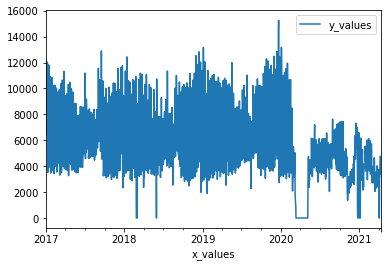

In [52]:
series1.plot()

In [53]:
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(series1)

(0.01, False)

we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

Split into train and test datasets to build the model on the training dataset and forecast using the test dataset.

In [54]:
series1[:1302]

,y_values
x_values,
2017-01-01,7627.12
2017-01-02,6987.16
2017-01-03,6480.88
2017-01-04,6601.46
2017-01-05,8447.41
...,...
2020-07-21,3535.51
2020-07-22,3888.35
2020-07-23,3665.17


In [71]:
train=series1[:1442] #5/6 del dataset per tenere conto del covid
test=series1[1442:1563] #1/6 del dataset


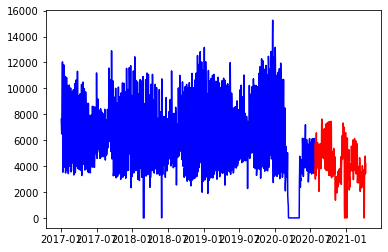

In [56]:
plt.plot(train,color="blue")
plt.plot(test,color="red")

Building Auto ARIMA model

Auto-Regressive (p) -> Number of autoregressive terms.

Integrated (d) -> Number of nonseasonal differences needed for stationarity.

Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components.

AIC - Akaike Information Criterion - metodo per la valutazione e il confronto tra modelli statistici. Il nostro obiettivo è trovare i valori di p,q,d che rendono minimo l'AIC. 

In [64]:
m2 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=3,max_d=3,max_q=3,
                      start_P=0,D=1,start_Q=0,max_P=3,max_D=3,max_Q=3,
                      m=12,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=25234.499, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=24621.655, Time=8.72 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=11.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=25233.914, Time=0.51 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=24254.056, Time=31.08 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=23819.696, Time=135.43 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=98.93 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=51.26 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=23896.221, Time=13.65 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=inf, Time=107.01 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=23471.747, Time=130.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=24216.790, Time=40.54 sec
 ARIMA(1,1,1)(3,1,1)[12]             : AIC=inf, Time=153.54 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=77.29 sec
 ARIMA(0,1,1)(3,1,0)[12]  

In [ ]:
arima_model.summary()

In [66]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1302
Model:             SARIMAX(2, 1, 2)x(3, 1, [], 12)   Log Likelihood              -11628.932
Date:                             Thu, 01 Jul 2021   AIC                          23273.864
Time:                                     19:33:30   BIC                          23315.156
Sample:                                          0   HQIC                         23289.363
                                            - 1302                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2300      0.071     -3.248      0.001      -0.369      -0.091
ar.L2         -0.3931      0.033    -11.908      0.000      -0.458      -0.328
ma.L1         -0.4716      0.069     -6.849      0.000      -0.607      -0.337
ma.L2         -0.2586      0.062     -4.155      0.000      -0.381      -0.137
ar.S.L12      -1.0189      0.026    -38.801      0.000      -1.070      -0.967
ar.S.L24      -1.1122      0.021    -52.171      0.000      -1.154      -1.070
ar.S.L36      -0.5535      0.025    -22.062      0.000      -0.603      -0.504
sigma2      4.277e+06   1.65e+05     25.870      0.000    3.95e+06     4.6e+06
===================================================================================
Ljung-Box (Q):                     1595.62   Jarque-Bera (JB):                24.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

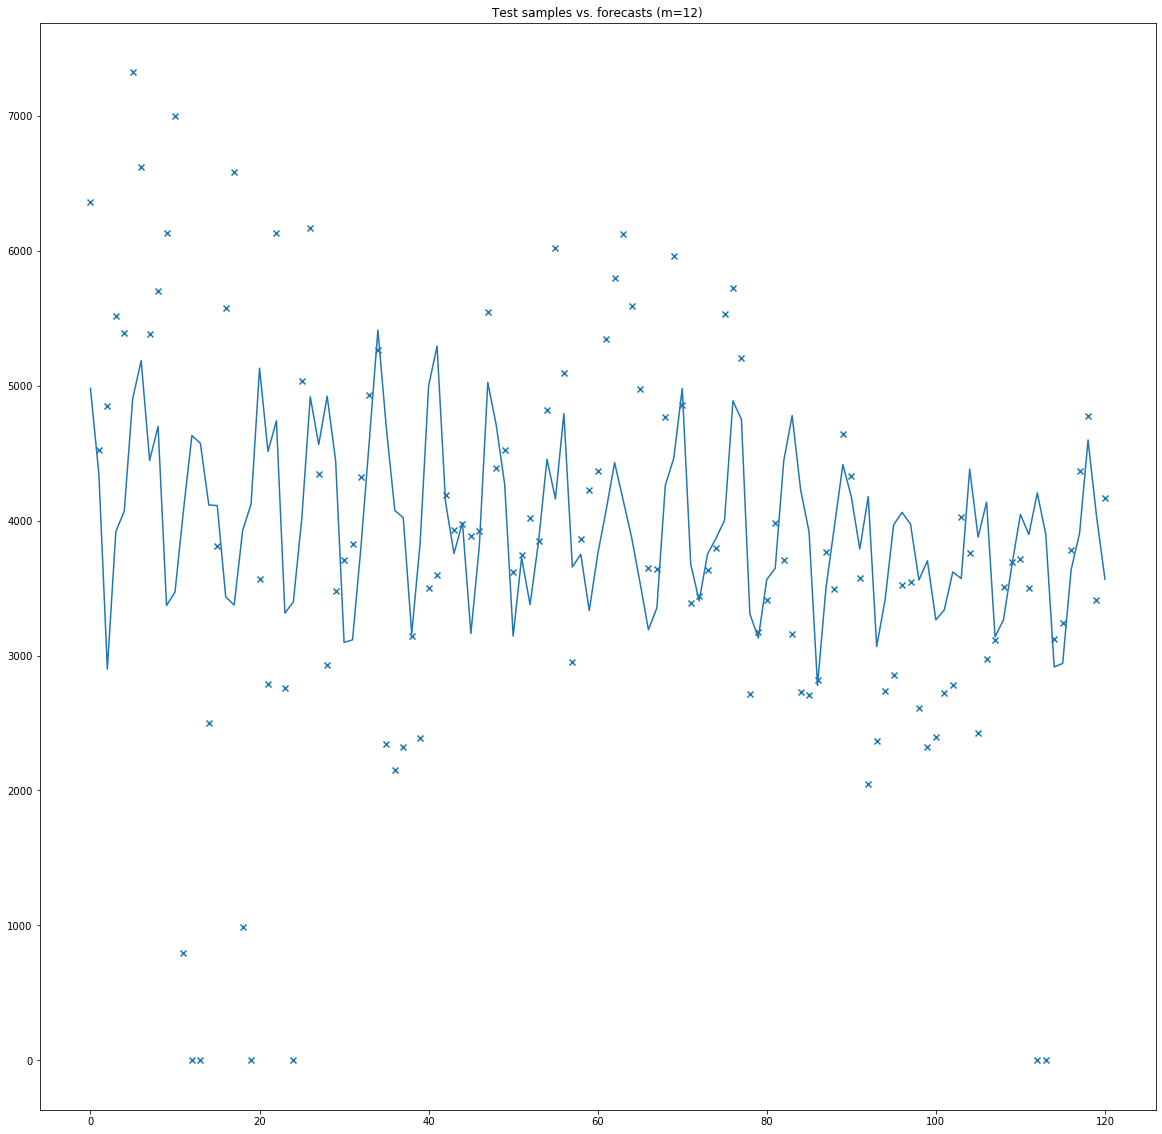

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
x = np.arange(test.shape[0])

# Plot m=1
plt.scatter(x, test, marker='x')
plt.plot(x, m2.predict(n_periods=test.shape[0]))
plt.title('Test samples vs. forecasts (m=12)')

plt.show()

In [69]:
prediction=pd.DataFrame(m2.predict(n_periods=121), index=test.index)
prediction.columns=["predicted_sales"]
prediction

,predicted_sales
x_values,
2020-12-13,4979.769745
2020-12-14,4342.763666
2020-12-15,2899.272744
2020-12-16,3917.589670
2020-12-17,4070.259601
...,...
2021-04-08,3635.904144
2021-04-09,3906.817724
2021-04-10,4597.477444


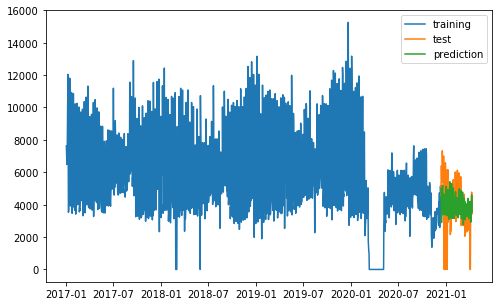

In [72]:
plt.figure(figsize=(8,5))

plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label="prediction")

plt.legend(loc="best")
plt.show()